# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves 

 For simplicity only the results of the classifcations are shown. The implementation can be found in the following     file: Lab1_privacy.py. The code can be runned via the method plotRocs(), where the correct data set must be 'activated'.

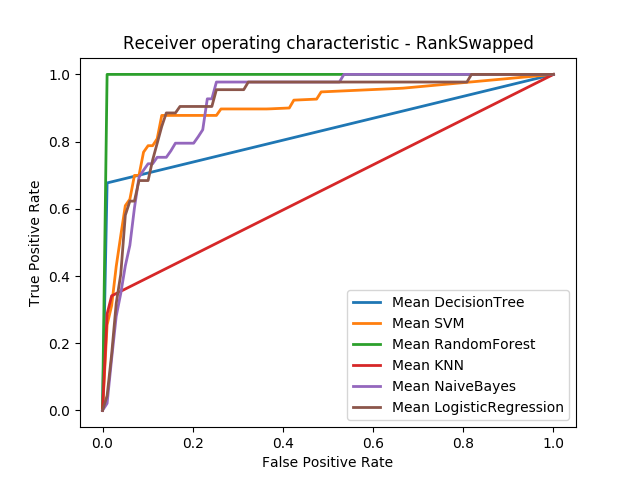

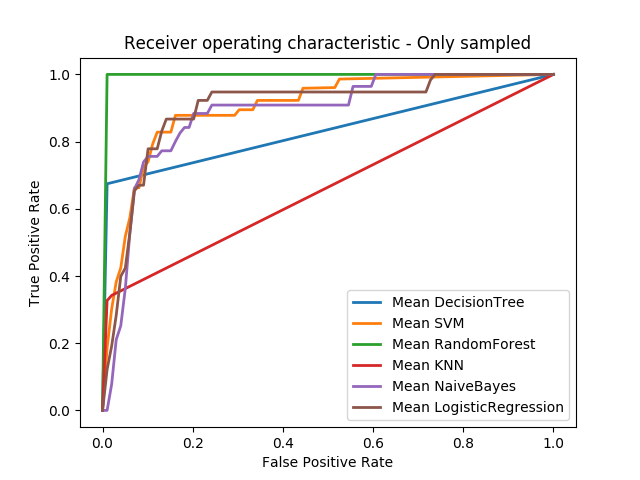

In [1]:
from IPython.display import Image
import Lab1_Privacy as pri
# pri.plotRocs()
display(Image(filename='figures/result_shuffeld.png'))

Image(filename='figures/result_only_sampled.png') 


### 3b. Analyse the performance of the classifiers. Explain which method performs best.

As can be seen in the two figures above, six different classification methods are used to classify the data.

Firstly, a sample of the whole data set is taken of approximately 50k records. To analyze the influence of the rank-swap method two data sets are compared. The first data set, ‘sampledData.csv’, only contains the sampled records, and the other data set ‘shuffledData.csv', contains the data on which the rank-swap algorithm is applied to protect the privacy of the data. The variable p used in the rank-swap algorithm is set to 10, to only switch values really close to each other. 

Furthermore, k-Cross-validation is used to generate test and training sets, where k is set to six to solve the classification problem within a feasible time. The training data is resampled using the built-in SMOTE function of the imblearn package.

In the plots above, the average ROC of the six different classification methods is plotted. From the figure, it can be seen that the k-nearest neighbor algorithm performs worst. The random forest classifier is able to classify the data the best and the ideal situation is reached. The performance of the other four methods are comparable, where logistic regression performs slightly better than the other three implemented methods. The performance of the different classifiers is further analyzed in the next section.


### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

As defined in the documentation of SKlearn, the random forest classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. This method already avoids overfitting by itself, this is of course not the case when you use, for example, KNN, where you need to define the hyperparameters yourself. Probably, the hyperparameters used for KNN are not optimal and preforms, therefore, the worst. The hyperparameters play a huge role in the performance of machine learning algorithms, so to check which algorithms perform best a detailed analysis must be done using several hyperparameters.

Comparing the performance of the classifiers on both datasets concluded could be that using the Rank-Swapping algorithm has minimal impact on the final result. This can be seen in the figures were the difference between the average ROC of each classifier is minimal. Therefore this technique can easily be used to protect the privacy of the data without having an influence on the final result. 
However, when very similar data is used where the number of different values per attribute is small, this method is not very useful. The reason for this is that you are swapping the same values over and over again. An example of this is the ‘shopperinteraction’ column which contains only three categories(Ecommerce, ContAuth, and POS). Performing the rank-swap algorithm on this column has minimal impact when using a small p-value. The columns that contain much more privacy-related content, for example, ip_id or card_id, where the values vary a lot, a small p-value could be used to protect the privacy of the data. Therefore, concluded could be that rank-swapping is an effective method to protect people’s privacy because features that contain a lot of privacy-related data often differ a lot.





## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below